In [17]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from pathlib import Path
import statistics

plt.style.use("dracula")
print("Voila!")

Voila!


In [2]:
def model_line(model, X, y, color_dp3d="black", color_dp2d="red", color_line2d="white", color_line3d="white", alpha=0.5):
    if X.shape[1] == 1:  # 2D Case
        plt.scatter(X.iloc[:, 0], y, marker=".", color=color_dp2d, label="Data")
        plt.plot(X.iloc[:, 0], model.predict(X), color=color_line2d, label="Model Prediction")
        plt.xlabel(X.columns[0])
        plt.ylabel(y.name)
        plt.legend()
        plt.show()

    elif X.shape[1] == 2:  # 3D Case
        plt.ion()
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], y, color=color_dp3d, label="Data", marker=".")
        
        # Plot for model predictions
        X_vals = X.iloc[:, 0]
        Y_vals = X.iloc[:, 1]
        Z_vals = model.predict(X)
        ax.plot_trisurf(X_vals, Y_vals, Z_vals, color=color_line3d, alpha=alpha, label="Model Prediction")

        ax.set_xlabel(X.columns[0])
        ax.set_ylabel(X.columns[1])
        ax.set_zlabel(y.name)
        ax.legend()
        plt.show()

    else:
        raise ValueError



def predictor_line(model, X, y):
    pred = model.predict(X)
    start = min(y.min(), pred.min())
    end = max(y.max(), pred.max())
    line = np.linspace(start, end, 100)

    plt.scatter(y, pred, marker=".", color="red")
    plt.plot(line, line)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")


def one_hot_encode(df, column):
    return pd.concat(
        [df, pd.get_dummies(df[column])],
        axis='columns',
    )

In [3]:
filename = Path(r"../sample csv data/Housing.csv")
filename.exists()

True

In [131]:
PRICE = 'price'
BATHROOMS = 'bathrooms'
BEDROOMS = 'bedrooms'
AREA = 'sqft_living'
WATERFRONT = 'waterfront'
ZIPCODE = 'zipcode'
YES = 1
NO = 0

COLUMNS = [PRICE, BATHROOMS, BEDROOMS, AREA, WATERFRONT, ZIPCODE]

raw_df = pd.read_csv(filename)
df = (
    raw_df[COLUMNS]
    .dropna()
    .drop_duplicates()
    .sort_values(AREA)
)

with_waterfront = df[df[WATERFRONT] == YES]
without_waterfront = df[df[WATERFRONT] == NO]
df = pd.concat([with_waterfront, without_waterfront])

In [134]:
without_waterfront.shape, with_waterfront.shape

((21383, 6), (163, 6))

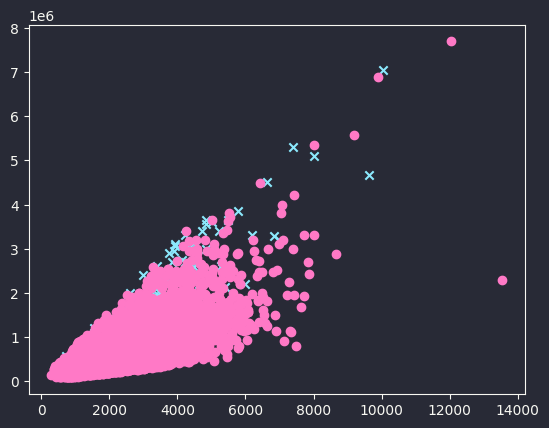

In [135]:
plt.scatter(with_waterfront[AREA], with_waterfront[PRICE], marker='x')
plt.scatter(without_waterfront[AREA], without_waterfront[PRICE], marker='o')

In [139]:
raw_df.view.value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64